**Advanced Astroinformatics (Semester 1 2024)**

# Light curve features (II)

**Advanced Astroinformatics Student Project**

*N. Hernitschek*



---
## Contents
* [Recap, Questions](#first-bullet)
* [Continue with feature extraction](#second-bullet)
* [Plotting features](#third-bullet)
* [Summary](#fifth-bullet)


## 1. Recap, Questions <a class="anchor" id="first-bullet"></a>

Time for questions!

Your **tasks until this week** were:

Try running the Fourier transformation, Lomb-Scargle Periodogram, and the feature extraction from the `feets` package on all stars from the TESS sample and report any issues you encounter.

hints:
* it will be faster if you run the code not in the Jupyter notebook, but write a Python code file and execute it from the command line
* think about which data should be written to your output table.

## 1. Continue with feature extraction <a class="anchor" id="second-bullet"></a>


### compare calculated features


The `feets` package provides the period features `PeriodLS` and `Period_fit`.
By using the documentation (website and paper), and your results, compare them.

Were period features calculated which seem to be unrealistic? How do you decide whether they are unrealistic?
Hint: type of star, length of light curve


### replace features calculated by `feets`


For the `feets` package, there is a bug reported regarding three features: `AndersonDarling`,`StetsonK`,`StetsonK_AC`.

To replace those features, look them up online. They are available in other common packages, and/or you can write the equations on your own.

Then rerun the feature calculation code with the following parameters:


In [23]:
import feets 
# exclude features "AndersonDarling","StetsonK","StetsonK_AC" as they are unreliable
fs = feets.FeatureSpace(data = ['time', 'magnitude', 'error'], exclude=["AndersonDarling","StetsonK","StetsonK_AC"])


and calculate the `AndersonDarling`,`StetsonK`,`StetsonK_AC` using other methods. Again, write a feature output table.
                            

## 2. Plotting features <a class="anchor" id="third-bullet"></a>


To compare which part of the **feature space** is occupied by different types of stars, we can use a **corner plot**. You have already installed the `corner` library in week 2.

Before running `corner` on your feature table (this will take a while), let's first plot some mock data to set up the plot.

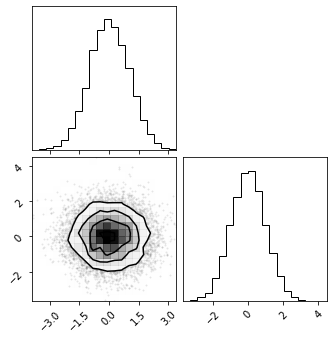

In [24]:
# a very basic corner plot

import corner
import numpy as np

# create mock data
ndim, nsamples = 2, 10000
np.random.seed(42)
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])
figure = corner.corner(samples)


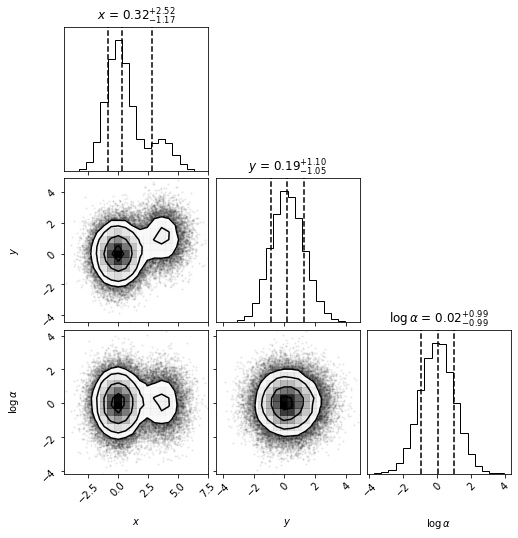

In [25]:

#that's how a corner plot for e.g. your report, or a publication should look like

# create mock data
ndim, nsamples = 3, 50000

# Generate some fake data.
np.random.seed(42)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape([4 * nsamples // 5, ndim])
data2 = (4*np.random.rand(ndim)[None, :] + np.random.randn(ndim * nsamples // 5).reshape([nsamples // 5, ndim]))
data = np.vstack([data1, data2])

# the operator // is the Floor division (dividing and rounding down to the nearest integer.)

# Plot it.
figure = corner.corner(data, labels=[r"$x$", r"$y$", r"$\log \alpha$", r"$\Gamma \, [\mathrm{parsec}]$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

We now want to create two data sets and plot them in the same corner plot.

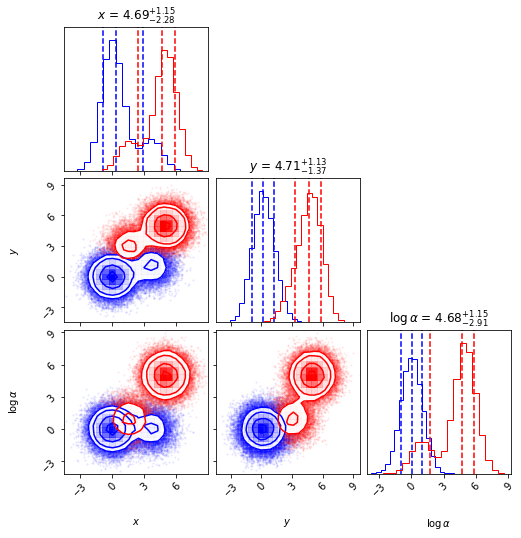

In [26]:
 

# create mock data
ndim, nsamples = 3, 50000

# Generate some fake data.
np.random.seed(42)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape([4 * nsamples // 5, ndim]) 
data2 = (4*np.random.rand(ndim)[None, :] + np.random.randn(ndim * nsamples // 5).reshape([nsamples // 5, ndim]))


data3 = np.random.randn(ndim * 4 * nsamples // 5).reshape([4 * nsamples // 5, ndim])+ 5.0
data4 = (4*np.random.rand(ndim)[None, :] + np.random.randn(ndim * nsamples // 5).reshape([nsamples // 5, ndim]))


data_1 = np.vstack([data1, data2])
data_2 = np.vstack([data3, data4])


# Plot it.
figure = corner.corner(data_1, labels=[r"$x$", r"$y$", r"$\log \alpha$", r"$\Gamma \, [\mathrm{parsec}]$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12}, color='blue')

figure = corner.corner(data_2, labels=[r"$x$", r"$y$", r"$\log \alpha$", r"$\Gamma \, [\mathrm{parsec}]$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12}, color='red', fig=figure)


**Your tasks until next week:**

Create a feature table showing the calculated features for all variable stars in the TESS sample (using the _TESS_lightcurves_outliercleaned light curves).

Use this feature table to create a triangle plot showing the features first for all variable stars from one star type (e.g.: ACV). If this works, for each type create a triangle plot.
Then, calculate the feature table also for the other versions of the light curves (_TESS_lightcurves_median_after_detrended, _TESS_lightcurves_raw). Overplot these features to each of your triangle plots. (I.e.: After this step you should have individual triangle plots for the types ACV, CEP, DCEP..., showing the calculated features for te raw, median/detrended, and outlier cleaned light curves.)

What do these triangle plots tell you?


## Summary <a class="anchor" id="fifth-bullet"></a>

At this point, you should have:
* an understanding of time series in astronomy
* seen some algorithms for extracting information from time series
* applied this to TESS light-curve data.

In [36]:
import os
import pandas as pd
import numpy as np
import feets
import corner
import matplotlib.pyplot as plt

# Define the data directory for raw light curves
data_dir = "/home/user/DAA11/TESS_lightcurves_raw"
star_types = ["ACV", "CEP", "DCEP"]

# Define the features to exclude
exclude_features = ["AndersonDarling", "StetsonK", "StetsonK_AC"]

# Initialize the feature space
fs = feets.FeatureSpace(data=['time', 'magnitude', 'error'], exclude=exclude_features)

# Function to calculate features for a light curve file
def calculate_features(file_path):
    # Read the light curve file without headers
    try:
        lc_data = pd.read_csv(file_path, delim_whitespace=True, header=None, comment='#')
        # Assign appropriate column names
        lc_data.columns = ['time', 'magnitude', 'error']
        
        # Convert columns to numeric, ignoring errors for non-numeric data
        lc_data['time'] = pd.to_numeric(lc_data['time'], errors='coerce')
        lc_data['magnitude'] = pd.to_numeric(lc_data['magnitude'], errors='coerce')
        lc_data['error'] = pd.to_numeric(lc_data['error'], errors='coerce')
        
        # Drop rows with NaN values
        lc_data.dropna(inplace=True)
        
        # Extract features using feets
        features, values = fs.extract(time=lc_data['time'].values,
                                      magnitude=lc_data['magnitude'].values,
                                      error=lc_data['error'].values)
        
        return pd.Series(values, index=features)
    
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return pd.Series()

# Dictionary to store feature tables for each star type
feature_tables = {star_type: pd.DataFrame() for star_type in star_types}

# Load a limited number of light curves and calculate features
num_files_to_process = 10

for star_type in star_types:
    star_type_dir = os.path.join(data_dir, star_type)
    feature_list = []
    lc_files = [lc_file for lc_file in os.listdir(star_type_dir) if lc_file.endswith(".lc")][:num_files_to_process]
    
    for lc_file in lc_files:
        lc_file_path = os.path.join(star_type_dir, lc_file)
        features = calculate_features(lc_file_path)
        if not features.empty:
            feature_list.append(features)
    
    feature_tables[star_type] = pd.DataFrame(feature_list)

    # Output feature table to CSV
    output_csv = f"feature_table_{star_type}.csv"
    feature_tables[star_type].to_csv(output_csv, index=False)

    # Create triangle plot
    feature_data = feature_tables[star_type].values  # Get the values from DataFrame
    
    if feature_data.shape[0] <= feature_data.shape[1]:
        print(f"Not enough samples for star type {star_type}. Skipping plot generation.")
        continue
    
    output_file = f"triangle_plot_{star_type}.png"
    title = f"Feature Triangle Plot for {star_type} Stars"
    
    try:
        create_triangle_plot(feature_data, fs, output_file, title)  # Pass all required arguments
    except AssertionError as e:
        print(f"AssertionError occurred for star type {star_type}: {e}")

# Function to create and save triangle plots
def create_triangle_plot(feature_data, fs, output_file, title):
    figure = corner.corner(feature_data, labels=fs.all_features(), show_titles=True, title_kwargs={"fontsize": 12})
    figure.suptitle(title)
    figure.savefig(output_file)
    plt.close()

print("Processing completed.")


/home/user/anaconda3/lib/python3.7/site-packages/feets/extractors/ext_eta_e.py:115: RuntimeWarning: divide by zero encountered in true_divide
  w = 1.0 / np.power(np.subtract(time[1:], time[:-1]), 2)
/home/user/anaconda3/lib/python3.7/site-packages/feets/extractors/ext_eta_e.py:125: RuntimeWarning: invalid value encountered in double_scalars
  time[0], 2) * S1 / (sigma2 * S2 * N ** 2))
/home/user/anaconda3/lib/python3.7/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/home/user/anaconda3/lib/python3.7/site-packages/feets/extractors/ext_eta_e.py:115: RuntimeWarning: divide by zero encountered in true_divide
  w = 1.0 / np.power(np.subtract(time[1:], time[:-1]), 2)
/home/user/anaconda3/lib/python3.7/site-packages/feets/extractors/ext_eta_e.py:125: RuntimeWarning: invalid value encountered in double_scalars
  time[0], 2) * S1 / (sigma2 * S2 * N ** 2))
/ho

Not enough samples for star type ACV. Skipping plot generation.


/home/user/anaconda3/lib/python3.7/site-packages/feets/extractors/ext_eta_e.py:115: RuntimeWarning: divide by zero encountered in true_divide
  w = 1.0 / np.power(np.subtract(time[1:], time[:-1]), 2)
/home/user/anaconda3/lib/python3.7/site-packages/feets/extractors/ext_eta_e.py:125: RuntimeWarning: invalid value encountered in double_scalars
  time[0], 2) * S1 / (sigma2 * S2 * N ** 2))
/home/user/anaconda3/lib/python3.7/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/home/user/anaconda3/lib/python3.7/site-packages/feets/extractors/ext_eta_e.py:115: RuntimeWarning: divide by zero encountered in true_divide
  w = 1.0 / np.power(np.subtract(time[1:], time[:-1]), 2)
/home/user/anaconda3/lib/python3.7/site-packages/feets/extractors/ext_eta_e.py:125: RuntimeWarning: invalid value encountered in double_scalars
  time[0], 2) * S1 / (sigma2 * S2 * N ** 2))
/ho

Not enough samples for star type CEP. Skipping plot generation.


Not enough samples for star type DCEP. Skipping plot generation.
Processing completed.
